In [37]:
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
stop_words = stopwords.words('english')
print(stop_words)
nltk.download('punkt')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [38]:
data = pd.read_json("/fils/anscombe.json",lines=True)
print(data)

                 review_id  ...                date
0   fdiNeiN_hoCxCMy2wTRW9g  ... 2013-01-20 13:25:59
1   G7XHMxG0bx9oBJNECG4IFg  ... 2016-05-07 01:21:02
2   rEITo90tpyKmEfNDp3Ou3A  ... 2017-05-26 01:23:19
3   bjD0Dqn3k-fi00BXatrytg  ... 2014-06-27 21:32:31
4   CelUWzp-GnJIiiV1mDUb-g  ... 2015-12-05 02:37:03
5   eed44nI0eZ4BGKtKXsRJhQ  ... 2014-09-25 08:15:44
6   UoFxqWXBluvS4Q32spb8Lg  ... 2014-10-27 04:22:34
7   9cW1B-T6M3ER3_rH_36h9Q  ... 2014-02-05 18:07:17
8   E4LqIZ7DJd_R4ZHSNKx4RQ  ... 2016-07-25 03:55:20
9   LrO2MkIWIjAoOeS5WImnrQ  ... 2018-04-15 11:34:34
10  p9U8-Bj9tFBqHa-wgaDKJg  ... 2015-07-16 05:40:33
11  dS5ERxmIP-CQ_ZV_q_xc0A  ... 2012-12-04 03:30:31
12  W6VRRz7mVGZLsidyHelHwg  ... 2011-01-09 00:07:16
13  yMXmJzpEah6XfS_SSu920A  ... 2011-02-13 17:46:55
14  IWinoppaEcMt5DrreAUR0Q  ... 2013-05-28 20:38:13
15  P1SXso5nMKwhHyTW6OIIIg  ... 2018-08-04 20:36:55
16  niN5qW_M5Y0W0zQEcQcFig  ... 2018-03-15 20:12:39
17  oMRfgrni0xBWo5zKaoxD4w  ... 2014-01-17 00:23:28
18  Pin7lN2A

In [39]:
#select with the same business_id
reviews = data.loc[data["business_id"]=="m7ommfJFalI47UksyX04Iw", "text"]
print(reviews)
s = reviews.to_string().replace("\\n","").lower()
print(type(s))
print(s)

5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [40]:
tokens = word_tokenize(s)
new_tokens =[t for t in tokens if t not in stopwords.words('english')]
final_tokens = [t for t in new_tokens if t.isalpha()]
print(tokens)
print(new_tokens)
print(final_tokens)

['5', 'met', 'a', 'friend', 'for', 'dinner', 'there', 'tonight', '.', 'the', 'server', 'only', 'brought', 'us', 'one', 'menu', '.', 'after', 'she', 'brought', 'us', 'a', 'couple', 'of', 'cokes', 'she', 'did', "n't", 'come', 'to', 'our', 'table', 'for', '20', 'mins', '.', 'after', 'trying', 'to', 'get', 'her', 'attention', 'a', 'few', 'times', 'when', 'she', 'walked', 'by', 'we', 'decided', 'to', 'just', 'order', 'off', 'the', 'bartender', '.', 'we', 'received', 'the', 'starters', 'and', 'the', 'mains', 'at', 'the', 'same', 'time', '.', 'the', 'wings', ',', 'brisket', ',', 'and', 'mac', 'and', 'cheese', 'were', 'alright', 'at', 'best', '.', 'at', 'this', 'point', 'we', 'had', "n't", 'seen', 'the', 'server', 'since', 'she', 'brought', 'the', 'food', ',', 'so', 'we', 'had', 'to', 'go', 'to', 'the', 'bar', 'for', 'more', 'napkins', 'and', 'refills', 'on', 'the', 'cokes', '.', 'the', 'most', 'we', 'actually', 'saw', 'our', 'server', 'was', 'when', 'she', 'hovered', 'over', 'us', 'as', 'we',

<class 'nltk.probability.FreqDist'>


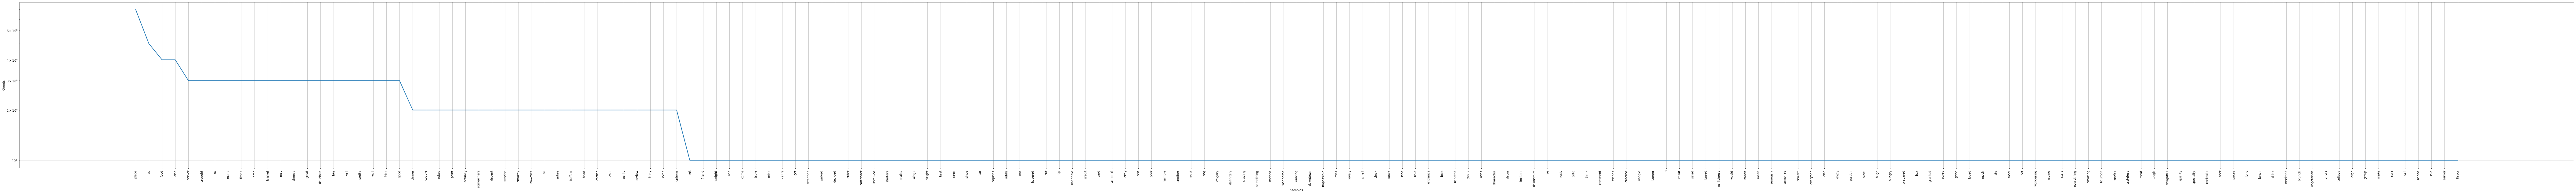

In [41]:
word_dist = FreqDist(final_tokens)
print(type(word_dist))
plt.figure(figsize=(150, 10))
plt.yscale('log')  # the size you want
word_dist.plot()